# Scraping Tarot Cards from Flickr

I found two really great accounts on Flickr that have some variations of classic tarot decks as well as some pretty unique ones: 
* ['CBD Tarot de Marseille' courtesy of Yoav Ben-Dov](https://www.flickr.com/photos/48485995@N00/)
* [Multiple decks courtesy of "Sumada's Treasure Box"](https://www.flickr.com/photos/sumadas-treasure-box/albums/with/72157650242007982)

Between these accounts, I should be able to add about 300-400 cards to my dataset, which should hopefully be sufficient to train with StyleGAN2-ADA.

Flickr has an API that I can use to pull the photos and thanks to [Alexis Mignon](https://github.com/alexis-mignon/python-flickr-api), I'm armed with a few methods that'll make this scrape a breeze. 

## Setup

In [1]:
import flickr_api
import os

In [2]:
base_path = os.getcwd()
base_path

'/Users/scrapfish/coding/metis/project5'

In [3]:
new_folder = '/data_files/other_decks'

In [4]:
path = base_path + new_folder

In [5]:
path

'/Users/scrapfish/coding/metis/project5/data_files/other_decks'

In [6]:
os.mkdir(path)

In [7]:
fkey = '#### KEY ####'
fsecret = '#### SECRET KEY ####'

flickr_api.set_keys(api_key=fkey, 
                    api_secret=fsecret)

## Flickr Scrape

In [8]:
def download_cards(photoset, file_prefix):
    i = 0
    print('Downloading photos...')
    for photo in photoset:
        
        if i < 10:
            photo.save(f'{path}/{file_prefix}0{str(i)}')
        else:
            photo.save(f'{path}/{file_prefix}{str(i)}')
        
        i += 1
    
    print("Download complete!")

### CBD Tarot de Marseille from 'yoav bd'

These tarot card images are the only photos for this user, so I can just pull them all from the account's main 'photostream'. 

In [9]:
cbd = flickr_api.Person.findByUserName('yoav bd')

In [10]:
cbd_deck = cbd.getPhotos()

In [12]:
cbd_deck

[Photo(id=b'5771299887', title=b'a19'), Photo(id=b'5771299473', title=b'a20'), Photo(id=b'5771842194', title=b'a21'), Photo(id=b'5771298787', title=b'a22'), Photo(id=b'5771298539', title=b'b01'), Photo(id=b'5771840542', title=b'a14'), Photo(id=b'5771840228', title=b'a15'), Photo(id=b'5771839942', title=b'a16'), Photo(id=b'5771839668', title=b'a17'), Photo(id=b'5771296043', title=b'a07'), Photo(id=b'5771295483', title=b'a09'), Photo(id=b'5771295299', title=b'a10'), Photo(id=b'5771838252', title=b'a11'), Photo(id=b'5771838072', title=b'a06'), Photo(id=b'5771837864', title=b'a03'), Photo(id=b'5771837664', title=b'a04'), Photo(id=b'5771837316', title=b'a01'), Photo(id=b'5771294123', title=b'a02'), Photo(id=b'5791074238', title=b'cardback'), Photo(id=b'5771313515', title=b'z01'), Photo(id=b'5771313383', title=b'e13'), Photo(id=b'5771313223', title=b'e14'), Photo(id=b'5771855796', title=b'e09'), Photo(id=b'5771312859', title=b'e10'), Photo(id=b'5771312673', title=b'e11'), Photo(id=b'57718552

Should get 80 photos from this pull

In [13]:
download_cards(cbd_deck, 'cbd_')

Download complete!


Let's take a look!

In [16]:
from IPython.display import Image, display
import imageio

import matplotlib.pyplot as plt
%matplotlib inline

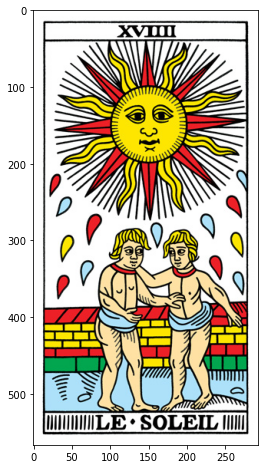

In [23]:
plt.figure(figsize=(5,8))
img1 = imageio.imread('data_files/other_decks/cbd_00.jpg')
plt.imshow(img1)
plt.show()

In [24]:
img1.shape

(567, 293, 3)

### Multiple decks from user  "Sumada's Treasure Box"

This user has a ton of great images. I don't want everything, but just a few select albums of tarot cards. With the Flickr API, I can scrape these by album name.

In [25]:
stb = flickr_api.Person.findByUserName("Sumada's Treasure Box")

In [26]:
photosets = stb.getPhotosets()

In [27]:
len(photosets)

117

In [28]:
photosets

[Photoset(id=b'72157678553481386', title=b'Niki de Saint Phal...), Photoset(id=b'72157664716208662', title=b'Ancien Tarot de Ma...), Photoset(id=b'72157661719547274', title=b'Lequart Tarot de B...), Photoset(id=b'72157656493668328', title=b'Resplendent in Div...), Photoset(id=b'72157651749969945', title=b'The New Tarot Deck...), Photoset(id=b'72157650880299381', title=b"Tarot d'Epinal"), Photoset(id=b'72157650242007982', title=b'Tarot Classic late...), Photoset(id=b'72157650166626035', title=b'Swiss 1JJ Wehman 1...), Photoset(id=b'72157650096412246', title=b'Swiss 1JJ Muller &...), Photoset(id=b'72157649750380350', title=b'Swiss 1JJ USGS 196...), Photoset(id=b'72157650111940882', title=b'Thoth 4 Language E...), Photoset(id=b'72157645449117289', title=b'Tarot Collectors F...), Photoset(id=b'72157642938396814', title=b'Grand Tarot Bellin...), Photoset(id=b'72157642586229013', title=b'1JJ Phanomene - Or...), Photoset(id=b'72157642585365793', title=b'Swiss 1JJ - US Gam...), Photoset(id=b'7

Below is a list of albums I want by name, and the prefix I'll use when downloading them.

In [36]:
# Example title from the photoset list above
photosets[0].title

'Niki de Saint Phalle Tarot Cards'

In [37]:
albums_dict = {'Ancien Tarot de Marseille': 'atm_',
               'Lequart Tarot de Besancon': 'ltb_',
               "Tarot d'Epinal": 'te_',
               'Tarot Classic late 19th.Century': 'classic_',
               'Tarocchi di Marsiglia - Mario Delucis': 'tm_',
               'Your Destiny by the Tarots': 'destiny_',
               'Nas. Conver Composite 1870-1960 Deck': 'comp_',
               'Hoi Polloi Tarot - Reiss Games Inc. 1972': 'reiss_',
               'The Keishobou Tarot': 'keishobou_',
               "Grand Jeu de L'Oracle des Dames": 'od_',
               "Oswald Wirth's Signature Deck - c.1926": 'ow_',
               'The New Tarot Deck': 'new_'
              }

In [44]:
for ps in photosets:
    idx = 0
    if ps.title in albums_dict.keys():
        print(f'Fetching photos for {ps.title}')
        photos = ps.getPhotos()
        prefix = albums_dict[ps.title]
        download_cards(photos, prefix)

Fetching photos for Ancien Tarot de Marseille
Download complete!
Fetching photos for Lequart Tarot de Besancon
Download complete!
Fetching photos for The New Tarot Deck
Download complete!
Fetching photos for Tarot d'Epinal
Download complete!
Fetching photos for Tarot Classic late 19th.Century
Download complete!
Fetching photos for Tarocchi di Marsiglia - Mario Delucis
Download complete!
Fetching photos for Your Destiny by the Tarots
Download complete!
Fetching photos for Nas. Conver Composite 1870-1960 Deck
Download complete!
Fetching photos for Hoi Polloi Tarot - Reiss Games Inc. 1972
Download complete!
Fetching photos for The Keishobou Tarot
Download complete!
Fetching photos for Grand Jeu de L'Oracle des Dames
Download complete!
Fetching photos for Oswald Wirth's Signature Deck - c.1926
Download complete!


In [47]:
onlyfiles = next(os.walk(path+"/"))[2] #dir is your directory path as string
print("Number of photos scraped: ",len(onlyfiles))

Number of photos scraped:  432


This plus the 79 photos from the Rider-Waite deck gives me just over 500 photos!

I will have to review what's been downloaded and remove a few -- not all of the cards are face up, some are just the backs of the cards or other images in that album. But not a bad start!

Let's get a random sampling of cards:

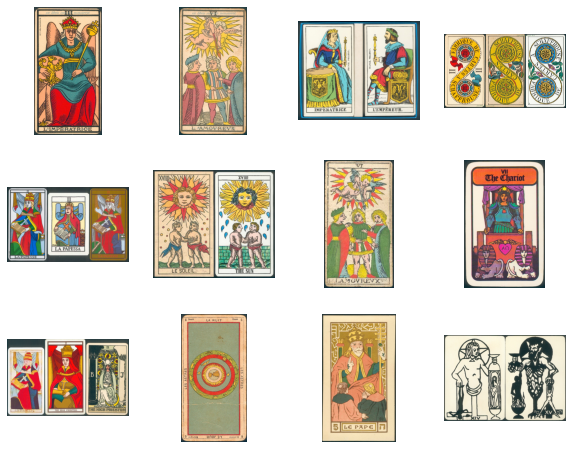

In [56]:
plt.figure(figsize=(10, 8))

for i, prefix in enumerate(albums_dict.values()):
    img = imageio.imread(f'data_files/other_decks/{prefix}05.jpg')
    plt.subplot(3,4,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()    

Great! Now to manually cull the decks a bit!